<a href="https://colab.research.google.com/github/lokeshtokas/Mobile-Price-Range-Prediction/blob/main/Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Range Prediction

`Predicting mobile price range based on its features set.`


---



## Business Context

---


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. 

The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. 

In this problem, we do not have to predict the actual price but a price range indicating how high the price is.


---



### Dataset Description

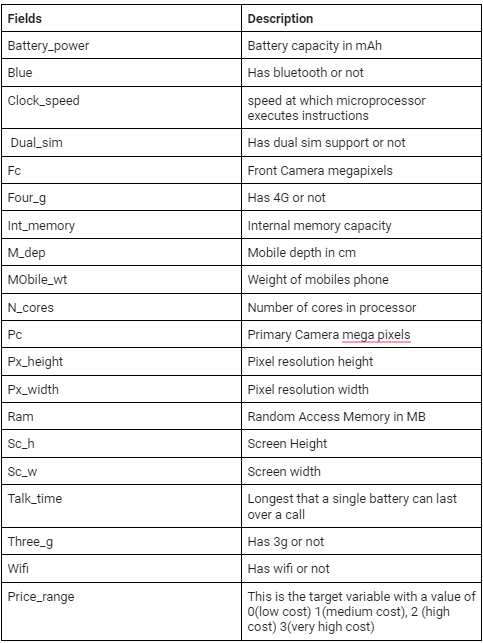



# EDA

## Data Collection

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
#hiding warning after final edit
import warnings
warnings.filterwarnings('ignore')

### Loading File

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/lokeshtokas/Mobile-Price-Range-Prediction/main/data_mobile_price_range.csv')

### **Data Overview**

In [ ]:
data.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## Data Cleaning

**From the data description, we have observerd some anomoly.**

---


> px_height (Pixel Height) = 0

> sc_w (screen width) = 0



---

**we need to examine this data future and decide either to replace or drop.**

In [ ]:
print('No of rows with 0 px_height value = ',data[data['px_height'] == 0].shape[0])
print('No of rows with 0 sc_w value = ',data[data['sc_w'] == 0].shape[0])

No of rows with 0 px_height value =  2
No of rows with 0 sc_w value =  180


**Since missing value consists of 9% of the entire data set and we have limit dataset to train, we can't drop these rows.**

**We have to replace these anomulus values.**

**we are going use KNN-Imputer since it will assign nearest possible value and not just a mean/avg value.**



1.   replace 0 with np.nan
2.   import knn-imputer
3.   perform impute




In [ ]:
data.loc[data['px_height']== 0, 'px_height'] = np.nan 

In [ ]:
data.loc[data['sc_w']== 0, 'sc_w'] = np.nan 

In [ ]:
data.isnull().sum()

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [ ]:
#since np.nan values are less scattered we are going with N neighbours = 3
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=3)
data=pd.DataFrame(impute_knn.fit_transform(data),columns=data.columns)

In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0


**All anomulus values have been sucessfully fixed.**

**Outlier Detection**

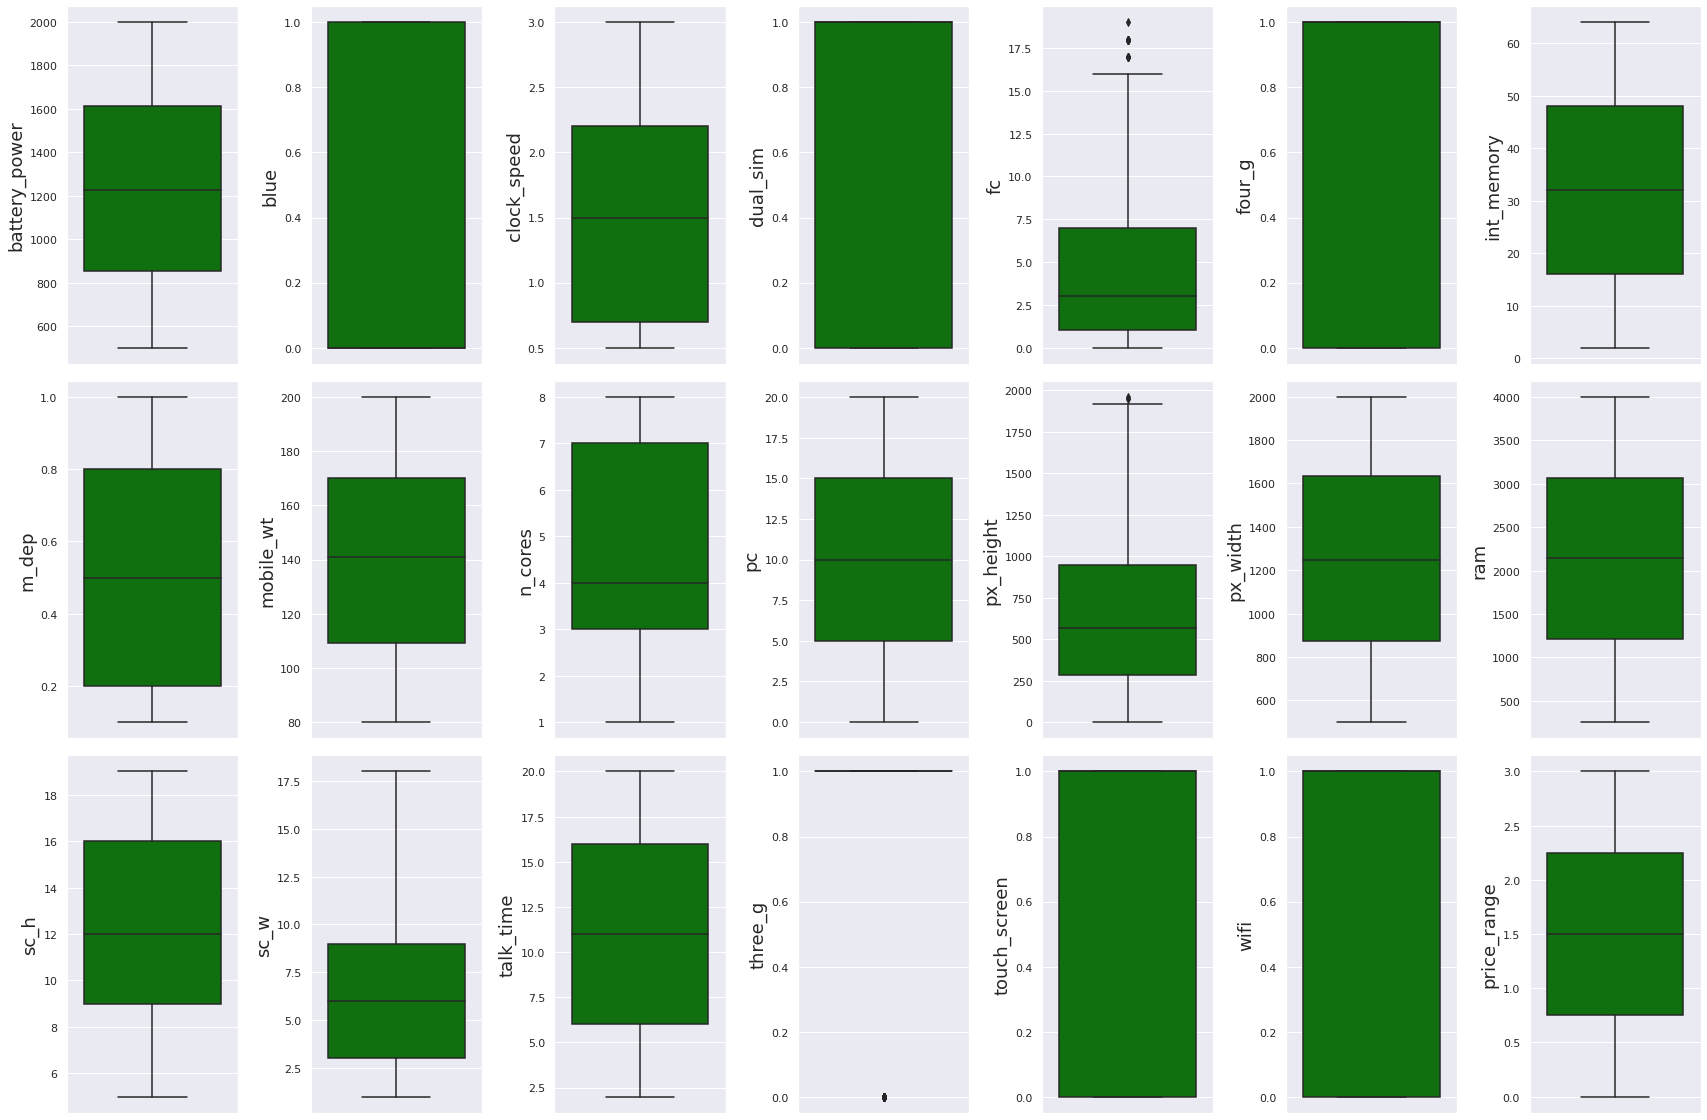

In [ ]:
i,j=0,0
PLOTS_PER_ROW = 7
fig, axs = plt.subplots(math.ceil(len(data.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(24, 16))


for col in data.columns :
  plt.tight_layout()  
  f = sns.boxplot(y=data[col], ax=axs[i,j], color = 'green' )
  f.set_ylabel(col,fontsize=18)
  j+=1
  if j%PLOTS_PER_ROW==0:
      i+=1
      j=0
plt.show()

**No Extreme Outliers detected.**

- In 'px_height' 1 possible outlier was highlighted but after examination it was observerd to be with in reason.
- In 'fc' few observervations were out of bound but normal to have high megapixel for experimental or emerging technology.

## Data Analysis

**Plot to see affect of features on price range**

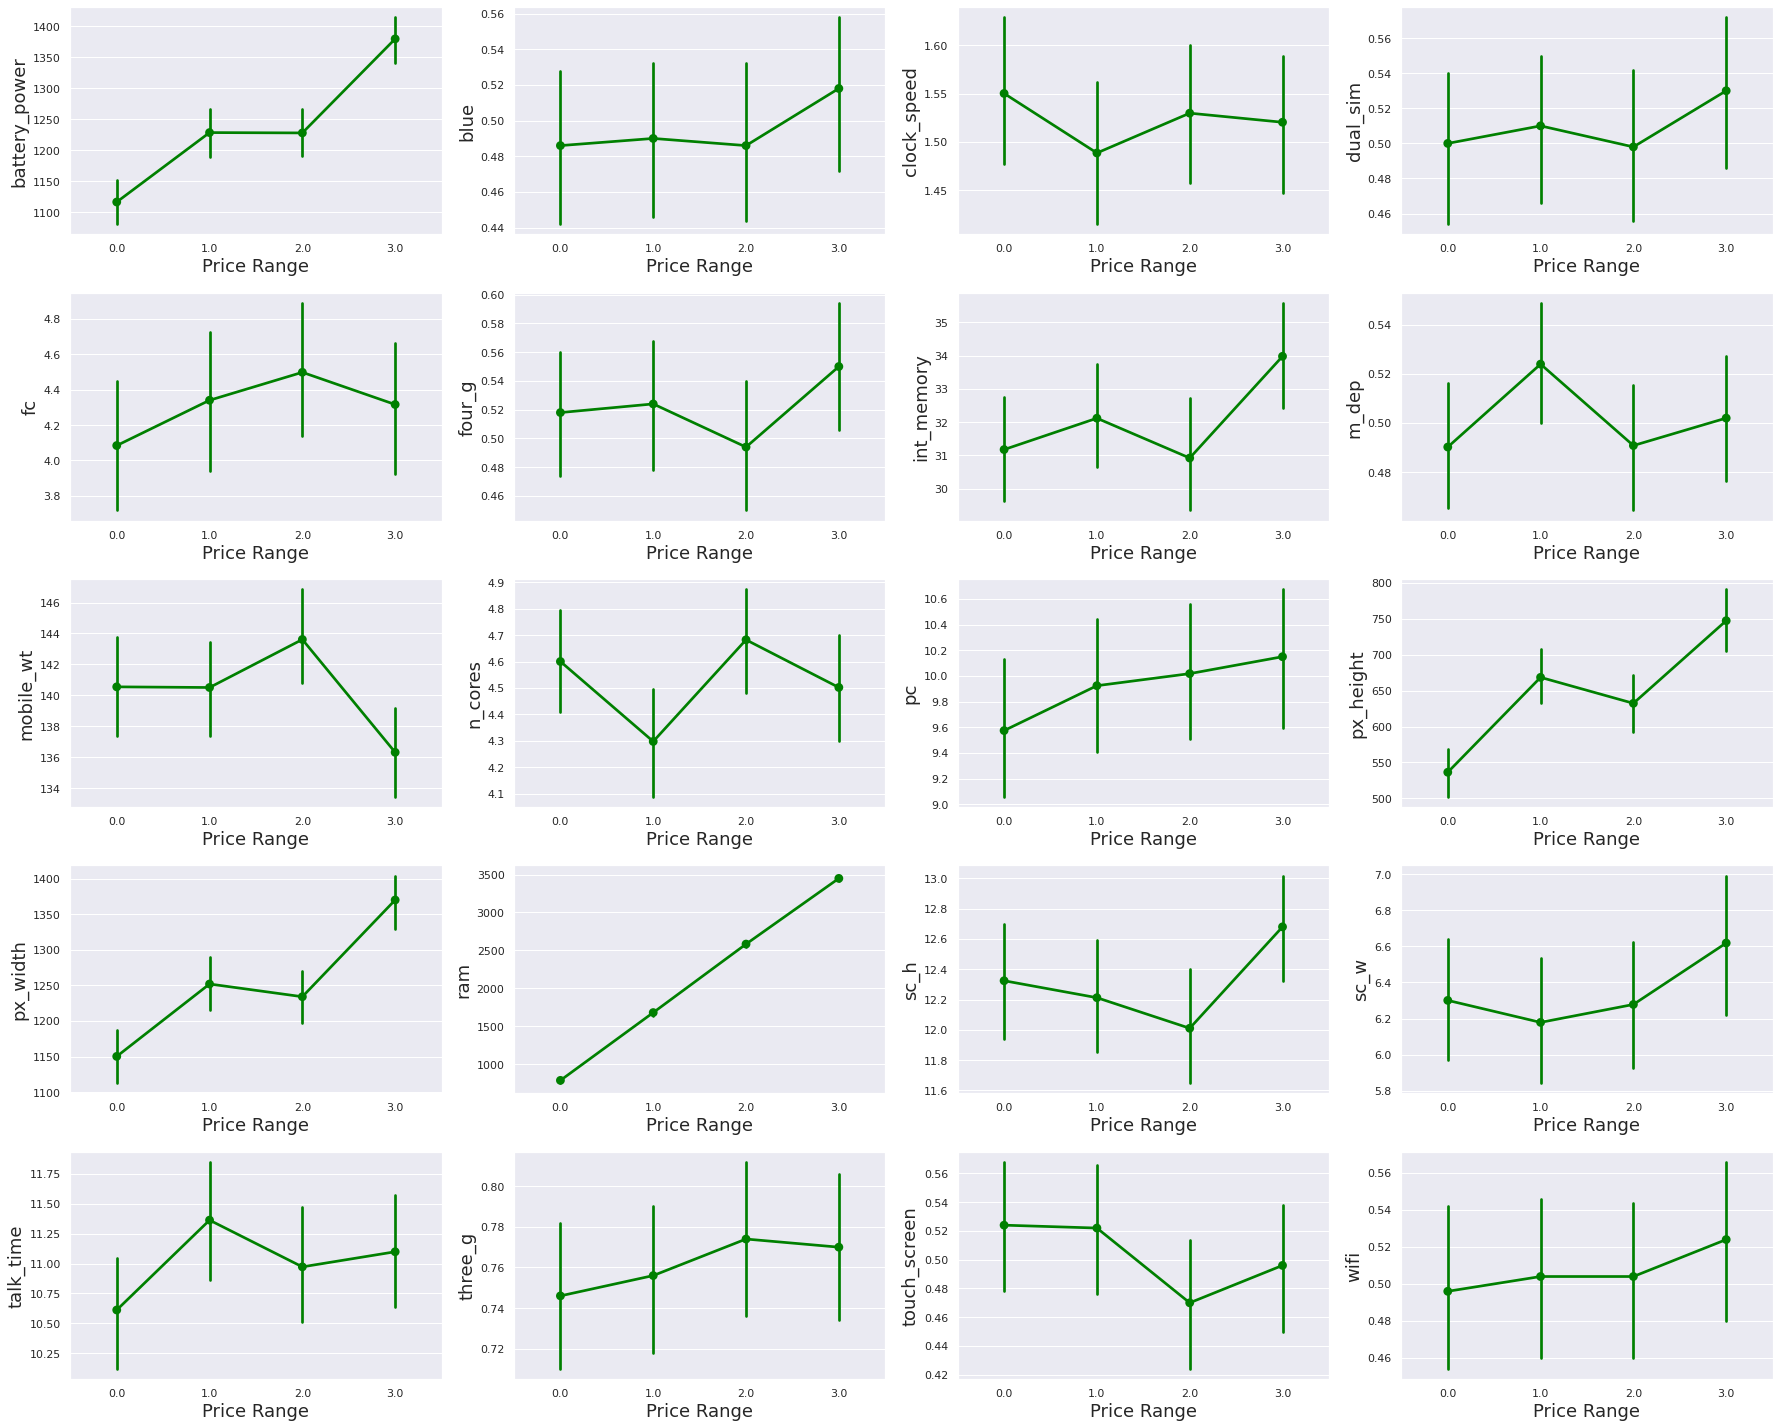

In [ ]:
i,j=0,0
PLOTS_PER_ROW = 4
fig, axs = plt.subplots(math.ceil((len(data.columns)-1)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(25, 20))

for col in data.columns :
  if col == 'price_range' :
    continue
  else :
    plt.tight_layout()
    f = sns.pointplot(data=data, x='price_range', y=data[col], ax=axs[i,j], color = 'green' )
    f.set_ylabel(col,fontsize=18)
    f.set_xlabel('Price Range',fontsize=18)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
plt.show()

**Features corelation**

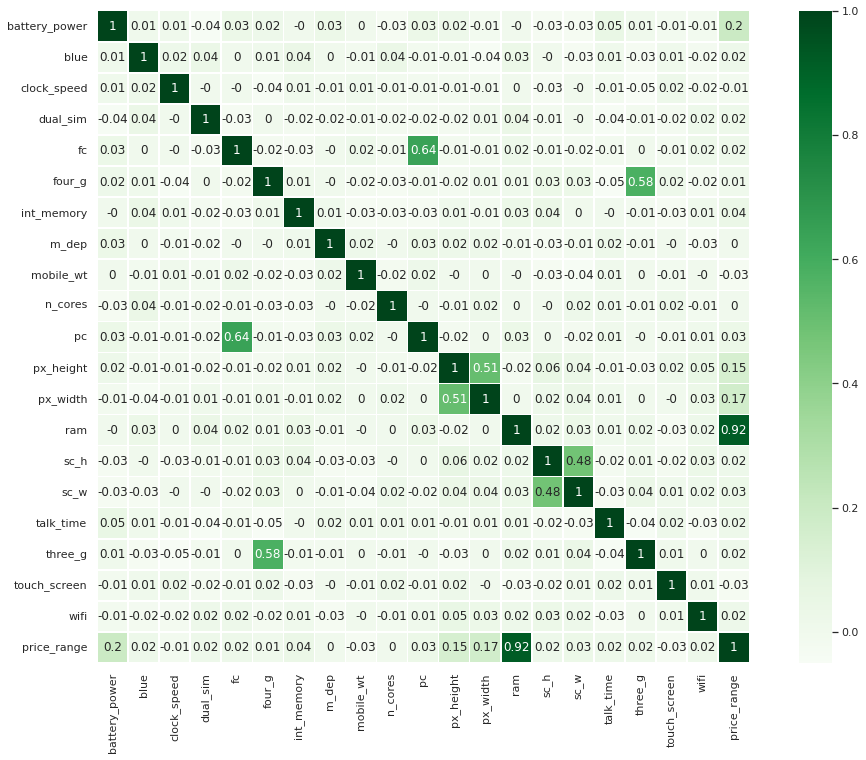

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(round(data.corr(),2),cmap="Greens",annot=True, square = True,linewidths=.5)
plt.show()

**Observations from this correlation matrix that :**

- 'ram' & "price range"(target variable) is highly correlated.
> More ram = Higher Price

- 'three_g' & 'four_g' is moderately correlated.

- 'pc' (primary camera) & 'fc' (front camera) is moderately correlated.

- 'px_height' & 'px_width' is moderately correlated.

- 'sc_h' & 'sc_w' (screen height & screen width) is moderately correlated.

**Feature Engineering**

In [ ]:
#converting screen width and height to diagnal.
data['screen'] = round(np.sqrt((data['sc_h']**2)+(data['sc_w']**2)),1)
data.drop(['sc_h','sc_w'],axis=1,inplace=True)

In [ ]:
#converting pixel width and height to PPI.
data['ppi'] = np.ceil(np.sqrt((data['px_height']**2)+(data['px_width']**2))/data['screen'])
data.drop(['px_height','px_width'],axis=1,inplace=True)

In [ ]:
#moving 'price_range' to last
data['price_range'] = data.pop('price_range')

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,screen,ppi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,2549.0,19.0,0.0,0.0,1.0,11.4,67.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,2631.0,7.0,1.0,1.0,0.0,17.3,127.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,2603.0,9.0,1.0,1.0,0.0,11.2,191.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,2769.0,11.0,1.0,0.0,0.0,17.9,121.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1411.0,15.0,1.0,1.0,0.0,8.2,209.0,1.0


**Feature Importance**

In [199]:
data_copy = data.copy()
X = data_copy.iloc[:,:18]
Y = data_copy.iloc[:,18:]